Folder created: /path/to/your/directory/beam_centers4
Processing 100 images.


Processing Images: 100%|██████████| 100/100 [00:06<00:00, 15.49image/s]

Updated detector shifts written to HDF5 file
Processing completed.
Folder created: /home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers4
Beam centers saved to /home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers4/beam_centers_downsample_factor0.1_median_filter_size1_num_slices4_radial_bins50_top_intensity_exc0.h5
Parameters and processing time saved to /home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers3/params_downsample_factor0.1_median_filter_size1_num_slices4_radial_bins50_top_intensity_exc0.txt


Successfully read /home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/beam_centers3/beam_centers_downsample_factor0.1_median_filter_size1_num_slices4_radial_bins50_top_intensity_exc0.h5 with 6813 selected indices
Successfully read /home/buster/UOX1/UOX1_min_10/CF_friedel/UOX1_min_10.h5 with 6809 selected indices


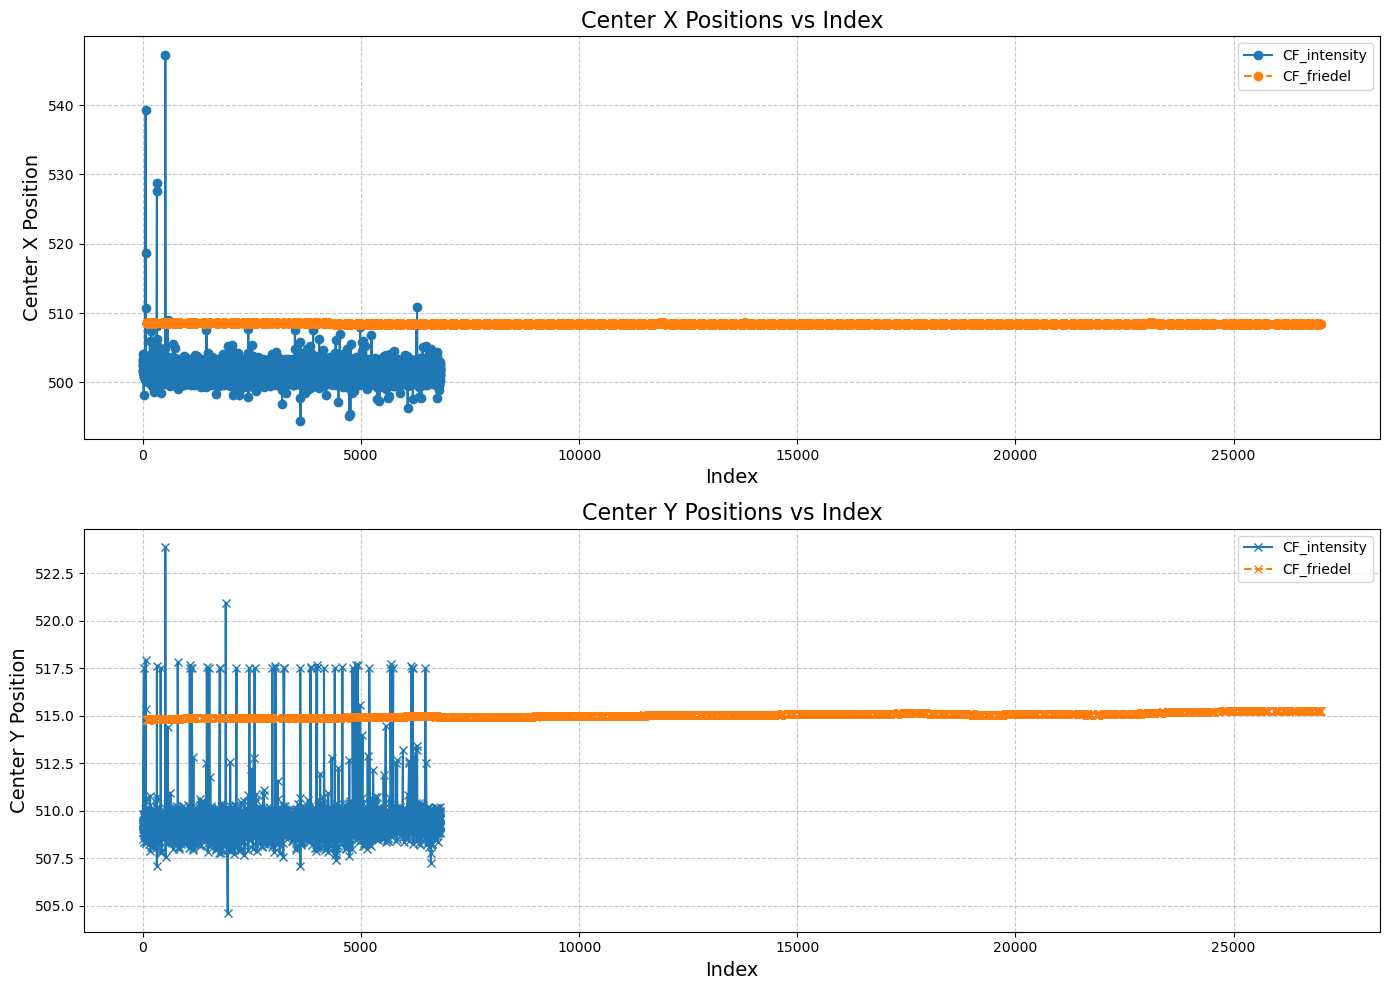

In [1]:
from find_center import find_center
from plot_center_positions_vs_index import plot_center_positions
import time
import os
import json

h5_file_path =  '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy5/UOX1_min_10.h5'
mask_path = '/home/buster/mask/pxmask.h5'
# selected_indices = list(range(0, 3000, 100)) 
selected_indices = list(range(0, 100)) 
# selected_indices = [12] 
# selected_indices = None

# Parameters copy1
median_filter_size = 1
top_intensity_exc = 0  # Exclude top (entered) percentage of intensities (0 = no exclusion)
downsample_factor = 0.1
center_initial = [508, 514]  # Use default initial center
radial_bins = 50  # Use default radial bins (100 bins)
num_slices = 4
plot = False
verbose = False

# Start timing
start_time = time.time()

# Call find_center with the new parameters
find_center(
    h5_file_path=h5_file_path,
    mask_path=mask_path,
    selected_indices=selected_indices,
    plot=plot,
    verbose=verbose,
    median_filter_size=median_filter_size,
    top_intensity_exc=top_intensity_exc,
    downsample_factor=downsample_factor,
    center_initial=center_initial,
    radial_bins=radial_bins,
    num_slices=num_slices
)

# End timing
end_time = time.time()
total_time_seconds = end_time - start_time

# Prepare parameter information
parameters = {
    'h5_file_path': h5_file_path,
    'selected_indices': selected_indices,
    'median_filter_size': median_filter_size,
    'top_intensity_exc': top_intensity_exc,
    'downsample_factor': downsample_factor,
    'center_initial': center_initial,
    'radial_bins': radial_bins,
    'num_slices': num_slices,
    'total_processing_time_seconds': total_time_seconds
}

# Create a dictionary of input parameters for naming
params = {
    'median_filter_size': median_filter_size,
    'top_intensity_exc': top_intensity_exc,
    'downsample_factor': downsample_factor,
    'radial_bins': radial_bins,
    'num_slices': num_slices,
    # Add other parameters if needed
}

params_str = json.dumps(params, sort_keys=True)
params_str_clean = params_str.replace(" ", "").replace(":", "").replace(",", "_").replace("{", "").replace("}", "").replace("\"", "")
txt_file_name = f"params_{params_str_clean}.txt"
h5_file_name = f"beam_centers_{params_str_clean}.h5"

h5_dir = os.path.dirname(h5_file_path)

for root, dirs, files in os.walk(h5_dir):
    if txt_file_name in files:
        txt_file_path = os.path.join(root, txt_file_name)
        h5_file_path = os.path.join(root, h5_file_name)
    
# Write parameters and processing time to the .txt file
try:
    with open(txt_file_path, 'a') as txt_file:
        for key, value in parameters.items():
            txt_file.write(f"{key}: {value}\n")
    print(f"Parameters and processing time saved to {txt_file_path}", flush=True)
except Exception as e:
    print(f"Failed to write parameters to text file: {e}", flush=True)

    
h5_files = [h5_file_path,
    '/home/buster/UOX1/UOX1_min_10/CF_friedel/UOX1_min_10.h5',
            ]

# Optional labels for each file
labels = [
        'CF_intensity',
        'CF_friedel'
           ]

# Define the indices you want to plot
# selected_indices = list(range(0, 5000)) 

# Call the plotting function
plot_center_positions(
    h5_paths=h5_files,
    # selected_indices=selected_indices,
    labels=labels
)

In [ ]:
from plot_center_positions_vs_index import plot_center_positions

h5_files = [
    # '/home/buster/UOX1/UOX1_min_50/background/UOX1_min_50.h5',
    '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy1/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy2/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy3/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity_copy4/UOX1_min_10.h5',
    # '/home/buster/UOX1/UOX1_min_10/CF_intensity/UOX1_min_10.h5',
    '/home/buster/UOX1/UOX1_min_10/CF_friedel/UOX1_min_10.h5',
            ]

# Optional labels for each file
labels = [
        'CF_intensity_copy1',
        # 'CF_intensity_copy2',
        # 'CF_intensity_copy3',
        # 'CF_intensity_copy4',
        # 'CF_intensity',
        'CF_friedel'
           ]

# Define the indices you want to plot
selected_indices = list(range(0, 20000)) 

# Call the plotting function
plot_center_positions(
    h5_paths=h5_files,
    selected_indices=selected_indices,
    labels=labels,
    # save_path='selected_indices_plot.png'  # Optional: specify a path to save the plot
)
